In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
#import tensorflow.contrib.keras as keras
import matplotlib.pyplot as plt
import os
import sys
import pickle
import itertools
import gensim
from sklearn.model_selection import train_test_split
from numpy import zeros
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from gensim.models import Word2Vec

In [0]:
cd '/content/drive/My Drive/'

/content/drive/My Drive


In [0]:
# Importing dataset
reviews_df = pd.read_csv('Hotel_Reviews.csv')
print(reviews_df.dtypes)

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object


In [0]:
def clean(text):
    '''
    '''
    text = text.lower()
    text = text.replace("ain't", "am not")
    text = text.replace("aren't", "are not")
    text = text.replace("can't", "cannot")
    text = text.replace("can't've", "cannot have")
    text = text.replace("'cause", "because")
    text = text.replace("could've", "could have")
    text = text.replace("couldn't", "could not")
    text = text.replace("couldn't've", "could not have")
    text = text.replace("should've", "should have")
    text = text.replace("should't", "should not")
    text = text.replace("should't've", "should not have")
    text = text.replace("would've", "would have")
    text = text.replace("would't", "would not")
    text = text.replace("would't've", "would not have")
    text = text.replace("didn't", "did not")
    text = text.replace("doesn't", "does not")
    text = text.replace("don't", "do not")
    text = text.replace("hadn't", "had not")
    text = text.replace("hadn't've", "had not have")
    text = text.replace("hasn't", "has not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd", "he would")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd've", "he would have")
    text = text.replace("'s", "")
    text = text.replace("'t", "")
    text = text.replace("'ve", "")
    text = text.replace(".", " . ")
    text = text.replace("!", " ! ")
    text = text.replace("?", " ? ")
    text = text.replace(";", " ; ")
    text = text.replace(":", " : ")
    text = text.replace(",", " , ")
    text = text.replace("´", "")
    text = text.replace("‘", "")
    text = text.replace("’", "")
    text = text.replace("“", "")
    text = text.replace("”", "")
    text = text.replace("\'", "")
    text = text.replace("\"", "")
    text = text.replace("-", "")
    text = text.replace("–", "")
    text = text.replace("—", "")
    text = text.replace("[", "")
    text = text.replace("]","")
    text = text.replace("{","")
    text = text.replace("}", "")
    text = text.replace("/", "")
    text = text.replace("|", "")
    text = text.replace("(", "")
    text = text.replace(")", "")
    text = text.replace("$", "")
    text = text.replace("+", "")
    text = text.replace("*", "")
    text = text.replace("%", "")
    text = text.replace("#", "")
    text = text.replace("\n", " \n ")
    text = text.replace("\n", "")
    text = text.replace("_", " _ ")
    text = text.replace("_", "")
    text = ''.join([i for i in text if not i.isdigit()])

    return text

positive_reviews = reviews_df['Positive_Review'].values
negative_reviews = reviews_df['Negative_Review'].values

cleaned_positive_reviews = [clean(r) for r in positive_reviews] 
cleaned_negative_reviews = [clean(r) for r in negative_reviews] 

reviews_df['Positive_Review'] = cleaned_positive_reviews
reviews_df['Negative_Review'] = cleaned_negative_reviews

In [0]:
# Shuffling data
reviews_df = reviews_df.sample(frac=1).reset_index(drop=True)

# Extracting all text
positive_reviews = reviews_df['Positive_Review'].values
negative_reviews = reviews_df['Negative_Review'].values
reviews_text = []

for p,n in zip(positive_reviews, negative_reviews) : 
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] : 
        reviews_text.append(n)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] : 
        reviews_text.append(p)
    else : 
        reviews_text.append(n)
        reviews_text.append(p)



In [0]:
# Preprocessing training data
training_df = reviews_df.loc[:10000]
positive_reviews_filtered = training_df['Positive_Review'].values
negative_reviews_filtered = training_df['Negative_Review'].values
training_reviews = []
labels = []

for idx,(p,n) in enumerate(zip(positive_reviews_filtered, negative_reviews_filtered)) : 
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] : 
        training_reviews.append(n)
        labels.append(0)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        training_reviews.append(p)
        labels.append(1)
    else :
        training_reviews.append(n)
        labels.append(0)
        training_reviews.append(p)
        labels.append(1)

# Creating datasets
dict1 ={
    'reviews' : training_reviews,
    'labels' : labels
}
sentiment_df = pd.DataFrame.from_dict(dict1)


dict2 ={
    'reviews_text' : reviews_text
}
reviews_text_df = pd.DataFrame.from_dict(dict2)

In [0]:
text_reviews = [str(r) for r in reviews_text_df['reviews_text'].values]

sentences = []

for review in text_reviews:
    words = text_to_word_sequence(review)
    sentences.append(words)

embeddings_model = Word2Vec(sentences, min_count=1, sg=1, size=128)
words = list(embeddings_model.wv.vocab)
print('{} WORDS '.format(len(words)))
print('Printing first 100:')
print(words[:100])

76904 WORDS 
Printing first 100:
['staff', 'friendliness', 'and', 'support', 'no', 'entertainment', 'facilities', 'a', 'perfect', 'location', 'on', 'old', 'paris', 'high', 'class', 'guests', 'antique', 'furniture', 'the', 'worst', 'room', 'service', 'food', 'i', 've', 'ever', 'had', 'haven', 't', 'been', 'to', 'prison', 'but', 'imagine', 'it', 's', 'similar', 'that', 'construction', 'going', 'all', 'day', 'long', 'was', 'unapologetic', 'not', 'willing', 'move', 'my', 'tiny', 'remote', 'functional', 'bedding', 'washed', 'so', 'many', 'times', 'pilling', 'felt', 'like', 'sandpaper', 'near', 'street', 'kensignton', 'tube', 'station', 'extra', 'little', 'touches', 'such', 'as', 'complimentary', 'glass', 'of', 'champagne', 'early', 'evening', 'supposed', 'be', 'deluxe', 'double', 'size', 'single', 'with', 'bed', 'squashed', 'in', 'im', 'impressed', 'really', 'hard', 'making', 'impossible', 'sleep', 'properly', 'attentive', 'friendly', 'nothing', 'one', 'best']


In [0]:
import keras

Using TensorFlow backend.


In [0]:
# Querying SQLlite database to extract needed words embeddings
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(text_reviews)
vocabSize = len(tokenizer.word_index) + 1
vocabSize

76905

In [0]:
vocabSize = len(tokenizer.word_index) + 1
print(vocabSize)

# Recreating embeddings index based on Tokenizer vocabulary
word2vec_vocabulary = embeddings_model.wv.vocab
embeddingIndex = dict()
counter = 0
for word, i in tokenizer.word_index.items():
    if word in word2vec_vocabulary :
        embeddingIndex[word] = embeddings_model[word]
    else:
        counter += 1

print("{} words without pre-trained embedding!".format(counter))
    
# Prepare embeddings matrix
embeddingMatrix = zeros((vocabSize, 128))
for word, i in tokenizer.word_index.items():
    embeddingVector = embeddingIndex.get(word)
    if embeddingVector is not None:
        embeddingMatrix[i] = embeddingVector

76905


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


0 words without pre-trained embedding!


In [0]:
reviews = [ str(r) for r in sentiment_df['reviews'].values]
labels = sentiment_df['labels'].values

for idx, review in enumerate(text_reviews):
    words = text_to_word_sequence(review)
    if(len(words) > 40): 
        words = words[:40]
        text_reviews[idx] = ' '.join(words)

oneHotReviews = tokenizer.texts_to_sequences(reviews)
encodedReviews = keras.preprocessing.sequence.pad_sequences(oneHotReviews, maxlen=40, padding='post')

X_train, X_test, y_train, y_test = train_test_split(encodedReviews, labels, test_size=0.33, random_state=42)

In [0]:
# define neural network
NN = keras.models.Sequential()
NN.add(keras.layers.Embedding(vocabSize, 128, weights=[embeddingMatrix], input_length=40, trainable=True))
NN.add(keras.layers.Flatten())
NN.add(keras.layers.Dense(1, activation='sigmoid'))
NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
NN.fit(X_train, y_train, epochs=5, verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/5
11270/11270 [==============================] - 40s 4ms/step - loss: 0.2971 - acc: 0.8893
Epoch 2/5
11270/11270 [==============================] - 39s 3ms/step - loss: 0.1616 - acc: 0.9459
Epoch 3/5
11270/11270 [==============================] - 38s 3ms/step - loss: 0.1219 - acc: 0.9600
Epoch 4/5
11270/11270 [==============================] - 39s 3ms/step - loss: 0.0984 - acc: 0.9677
Epoch 5/5
11270/11270 [==============================] - 38s 3ms/step - loss: 0.0795 - acc: 0.9736


In [0]:
 loss, accuracy = NN.evaluate(X_test, y_test, verbose=1)
print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(accuracy))

5551/5551 [==============================] - 0s 36us/step
Test Loss: 0.2110296586862965
Test Accuracy: 0.9301027059555054


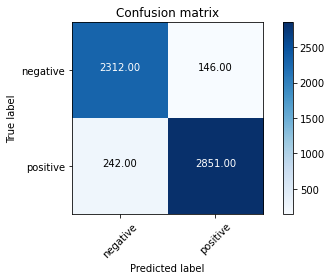

In [0]:
predictions = NN.predict_classes(X_test)

cm = confusion_matrix(y_test, predictions, labels=[0,1])
title = 'Confusion matrix'
cmap = plt.cm.Blues
classes=["negative","positive"]
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [0]:
report = classification_report(y_test, predictions, target_names=['0','1'])
print(report)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2458
           1       0.95      0.92      0.94      3093

    accuracy                           0.93      5551
   macro avg       0.93      0.93      0.93      5551
weighted avg       0.93      0.93      0.93      5551



In [0]:
NN.layers[-1].activation='sigmoid'
NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

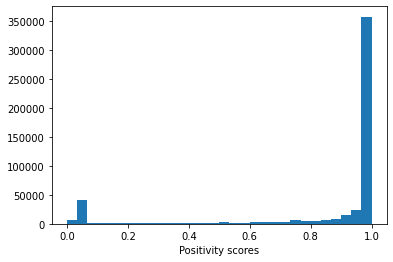

In [0]:
positive_reviews = [str(r) for r in reviews_df['Positive_Review'].values]

for idx, review in enumerate(positive_reviews):
    words = text_to_word_sequence(review)     
    if(len(words) > 40): 
        words = words[:40]
        positive_reviews[idx] = ' '.join(words)

oneHotPositiveReviews = tokenizer.texts_to_sequences(positive_reviews)
encodedPositiveReviews = keras.preprocessing.sequence.pad_sequences(oneHotPositiveReviews, maxlen=40, padding='post')


positivity_predictions = NN.predict_proba(encodedPositiveReviews)

plt.hist(positivity_predictions, bins=30)
plt.xlabel('Positivity scores');
plt.show() 

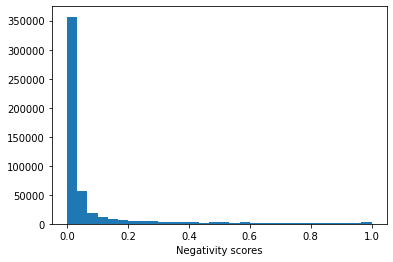

In [0]:
negative_reviews = [str(r) for r in reviews_df['Negative_Review'].values]

for idx, review in enumerate(negative_reviews):
    words = text_to_word_sequence(review)      
    if(len(words) > 40): 
        words = words[:40]
        negative_reviews[idx] = ' '.join(words)

oneHotNegativeReviews = tokenizer.texts_to_sequences(negative_reviews)
encodedNegativeReviews = keras.preprocessing.sequence.pad_sequences(oneHotNegativeReviews, maxlen=40, padding='post')


negativity_predictions = NN.predict_proba(encodedNegativeReviews)
    
# print(negativity_predictions)
plt.hist(negativity_predictions, bins=30)
plt.xlabel('Negativity scores');
plt.show() 

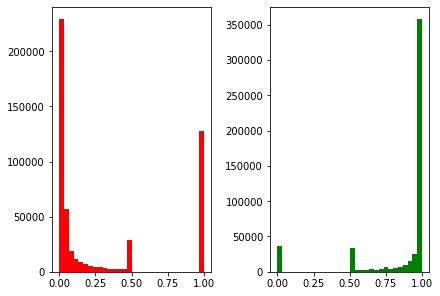

In [0]:
negative_reviews = reviews_df['Negative_Review'].values
positive_reviews = reviews_df['Positive_Review'].values

missing = ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative']

for idx, (text,score) in enumerate(zip(positive_reviews, positivity_predictions)):
    if text in missing : positivity_predictions[idx] = 0.0
    elif score < 0.5 : positivity_predictions[idx] = 0.501

for idx, (text,score) in enumerate(zip(negative_reviews, negativity_predictions)):
    if text in missing : negativity_predictions[idx] = 1.0
    elif score > 0.5 : negativity_predictions[idx] = 0.499

# Printing final distributions
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True)
axes[0].hist(negativity_predictions, color='red', bins=30)
axes[1].hist(positivity_predictions, color='green', bins=30)
plt.show() 


In [0]:
reviews_df['Negative_Review_Score'] = negativity_predictions
reviews_df['Positive_Review_Score'] = positivity_predictions
reviews_df['Sentiment_Review_Score'] = (positivity_predictions+negativity_predictions)/2

positive_reviews = reviews_df['Positive_Review']
negative_reviews = reviews_df['Negative_Review']
sentiment_scores = reviews_df['Sentiment_Review_Score']
reviewer_score = reviews_df['Reviewer_Score']

print('Positive review: {}'.format(reviews_df['Positive_Review'][100]))
print('Negative review: {}'.format(reviews_df['Negative_Review'][100]))
print('Sentiment score: {}'.format(reviews_df['Sentiment_Review_Score'][100]))
print('Reviewer score: {}'.format(reviews_df['Reviewer_Score'][100]))

Positive review:  great access to the subway station and from the milan central station nice staffs clean dinner was much better than expected enjoyed it air conditioning worked well nice central station view as the station is beautiful 
Negative review:  nothing breakfast is less great than dinner i liked it as a single traveller if you travel together and plan to have a nice dinner outside and have breakfast only you might be less satisfiable than me 
Sentiment score: 0.5006932020187378
Reviewer score: 9.6


In [0]:
target = []
final_scores = reviews_df['Sentiment_Review_Score'].values

for f in final_scores : 
    if f >= 0.7 : target.append(4)
    elif f < 0.7 and f >= 0.5 : target.append(3)
    elif f < 0.5 and f >= 0.3 : target.append(2)
    else: target.append(1)

reviews_df['Sentiment_Review_Class'] = target

Number of best reviews:  150051
Number of good reviews:  202176
Number of bad reviews:   107629
Number of worst reviews: 55882


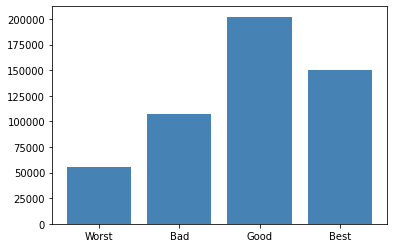

In [0]:
reviews_best = reviews_df[reviews_df['Sentiment_Review_Class'] == 4]['Positive_Review'].values
print('Number of best reviews:  {}'.format(len(reviews_best)))
      
reviews_good = reviews_df[reviews_df['Sentiment_Review_Class'] == 3]['Positive_Review'].values
print('Number of good reviews:  {}'.format(len(reviews_good)))
      
reviews_bad = reviews_df[reviews_df['Sentiment_Review_Class'] == 2]['Negative_Review'].values
print('Number of bad reviews:   {}'.format(len(reviews_bad)))
      
reviews_worst = reviews_df[reviews_df['Sentiment_Review_Class'] == 1]['Negative_Review'].values
print('Number of worst reviews: {}'.format(len(reviews_worst)))

fig, ax = plt.subplots()
x = ['Worst','Bad', 'Good', 'Best']
y = [len(reviews_worst),len(reviews_bad),len(reviews_good),len(reviews_best)]
vert_bars = ax.bar(x, y, color='steelblue', align='center')
plt.show()

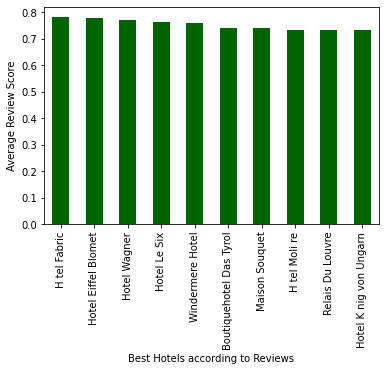

Hotel_Name
H tel Fabric               0.781658
Hotel Eiffel Blomet        0.779709
Hotel Wagner               0.770354
Hotel Le Six               0.764325
Windermere Hotel           0.760094
Boutiquehotel Das Tyrol    0.740217
Maison Souquet             0.738912
H tel Moli re              0.734633
Relais Du Louvre           0.733006
Hotel K nig von Ungarn     0.732114
Name: Sentiment_Review_Score, dtype: float32

In [0]:
#Printing best and worst hotels according to sentiment analysis__ 
worst_hotels = reviews_df.groupby('Hotel_Name')['Sentiment_Review_Score'].mean().sort_values(ascending=False).head(10)
worst_hotels.plot(kind="bar",color="DarkGreen")
_=plt.xlabel('Best Hotels according to Reviews')
_=plt.ylabel('Average Review Score')
plt.show()

reviews_df.groupby('Hotel_Name')['Sentiment_Review_Score'].mean().sort_values(ascending=False).head(10)

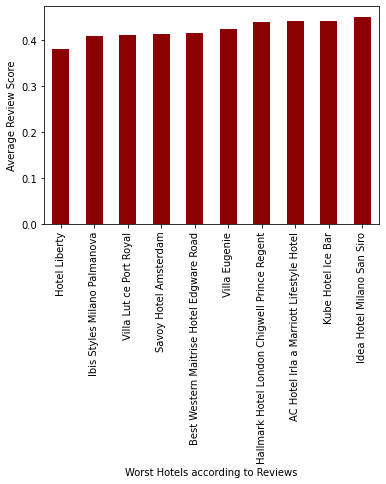

Hotel_Name
Hotel Liberty                                   0.380234
Ibis Styles Milano Palmanova                    0.408664
Villa Lut ce Port Royal                         0.409487
Savoy Hotel Amsterdam                           0.411460
Best Western Maitrise Hotel Edgware Road        0.414584
Villa Eugenie                                   0.423662
Hallmark Hotel London Chigwell Prince Regent    0.438305
AC Hotel Irla a Marriott Lifestyle Hotel        0.439905
Kube Hotel Ice Bar                              0.440094
Idea Hotel Milano San Siro                      0.450023
Name: Sentiment_Review_Score, dtype: float32

In [0]:
worst_hotels = reviews_df.groupby('Hotel_Name')['Sentiment_Review_Score'].mean().sort_values(ascending=True).head(10)
worst_hotels.plot(kind="bar",color="DarkRed")
_=plt.xlabel('Worst Hotels according to Reviews')
_=plt.ylabel('Average Review Score')
plt.show()

reviews_df.groupby('Hotel_Name')['Sentiment_Review_Score'].mean().sort_values(ascending=True).head(10)

In [0]:
# serialize to JSON
json_file = NN.to_json()
with open(json_file_path, "w") as file:
   file.write(json_file)
# serialize weights to HDF5
NN.save_weights(h5_file)

AttributeError: ignored